Nenhum índice aceitável encontrado. Ajuste o limite da função objetivo.
Os pesos otimizados são [-6.06862353e+43  5.11627645e+43]
A taxa ótima é 0.1


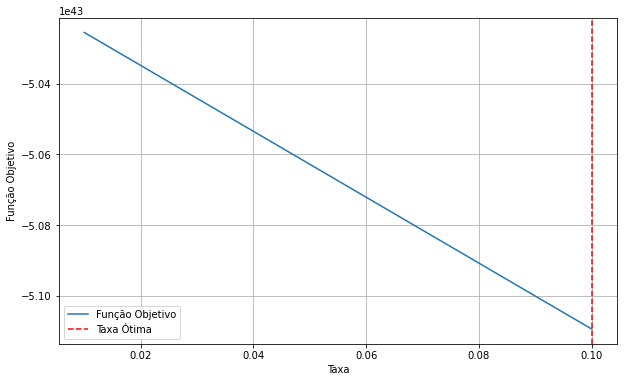

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Variáveis fictícias para simulação
variables = np.random.rand(80)

# Funções simples para substituir os modelos de churn e receita
def predict_churn(rate, variables):
    return rate * variables[0]

def predict_revenue(rate, variables):
    return (1 - rate) * variables[0]

# Função para calcular a função objetivo para um conjunto de pesos e taxa
def weighted_objective(weights, rate, variables):
    churn_prob = predict_churn(rate, variables)
    revenue_prob = predict_revenue(rate, variables)
    return weights[0] * churn_prob - weights[1] * revenue_prob

# Intervalo de taxas a serem testadas
rate_range = np.linspace(0.01, 0.1, 1000)

# Pesos iniciais
initial_weights = [0.5, 0.5]

# Função objetivo para a otimização dos pesos
def weights_objective(weights):
    objective_values = [weighted_objective(weights, rate, variables) for rate in rate_range]
    return np.min(objective_values)

# Busca os pesos que minimizam a função objetivo
weights_result = minimize(weights_objective, initial_weights, method='Nelder-Mead')

# Os pesos otimizados
optimized_weights = weights_result.x

# Calcula a função objetivo para cada taxa usando os pesos otimizados
objective_values = [weighted_objective(optimized_weights, rate, variables) for rate in rate_range]

# Encontra o índice da taxa ótima
optimal_index = np.argmin(objective_values)

# Escolha um limite aceitável para a variação da função objetivo
objective_limit = min(objective_values) * 1.05

# Encontra os índices das taxas que estão dentro do limite aceitável
acceptable_indices = [i for i, value in enumerate(objective_values) if value <= objective_limit]

# As taxas de piso e teto são as taxas mínimas e máximas, respectivamente, dentro do intervalo aceitável
if acceptable_indices:
    floor_rate = rate_range[min(acceptable_indices)]
    ceiling_rate = rate_range[max(acceptable_indices)]
else:
    print("Nenhum índice aceitável encontrado. Ajuste o limite da função objetivo.")
    floor_rate = None
    ceiling_rate = None

print(f"Os pesos otimizados são {optimized_weights}")
print(f"A taxa ótima é {rate_range[optimal_index]}")
if floor_rate and ceiling_rate:
    print(f"A taxa de piso é {floor_rate}")
    print(f"A taxa de teto é {ceiling_rate}")

# Para visualizar a curva de preço
plt.figure(figsize=(10,6))
plt.plot(rate_range, objective_values, label='Função Objetivo')
plt.axvline(x=rate_range[optimal_index], color='r', linestyle='--', label='Taxa Ótima')
if floor_rate and ceiling_rate:
    plt.axvline(x=floor_rate, color='g', linestyle='--', label='Taxa de Piso')
    plt.axvline(x=ceiling_rate, color='b', linestyle='--', label='Taxa de Teto')
plt.xlabel('Taxa')
plt.ylabel('Função Objetivo')
plt.legend()
plt.grid(True)
plt.show()


Nenhum índice aceitável encontrado. Ajuste o limite da função objetivo.
Os pesos otimizados são [-6.06862353e+43  5.11627645e+43]
A taxa ótima é 1.0


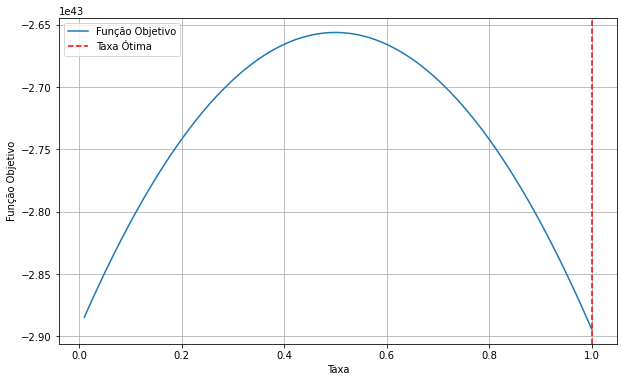

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Variáveis fictícias para simulação
variables = np.random.rand(80)

# Funções ajustadas para retornarem um valor quadrático em relação à taxa
def predict_churn(rate, variables):
    return (rate - 0.5)**2 + variables[0]

def predict_revenue(rate, variables):
    return -1*(rate - 0.5)**2 + variables[0]

# Função para calcular a função objetivo para um conjunto de pesos e taxa
def weighted_objective(weights, rate, variables):
    churn_prob = predict_churn(rate, variables)
    revenue_prob = predict_revenue(rate, variables)
    return weights[0] * churn_prob - weights[1] * revenue_prob

# Intervalo de taxas a serem testadas
rate_range = np.linspace(0.01, 1, 1000)

# Pesos iniciais
initial_weights = [0.5, 0.5]

# Função objetivo para a otimização dos pesos
def weights_objective(weights):
    objective_values = [weighted_objective(weights, rate, variables) for rate in rate_range]
    return np.min(objective_values)

# Busca os pesos que minimizam a função objetivo
weights_result = minimize(weights_objective, initial_weights, method='Nelder-Mead')

# Os pesos otimizados
optimized_weights = weights_result.x

# Calcula a função objetivo para cada taxa usando os pesos otimizados
objective_values = [weighted_objective(optimized_weights, rate, variables) for rate in rate_range]

# Encontra o índice da taxa ótima
optimal_index = np.argmin(objective_values)

# Escolha um limite aceitável para a variação da função objetivo
objective_limit = min(objective_values) * 1.05

# Encontra os índices das taxas que estão dentro do limite aceitável
acceptable_indices = [i for i, value in enumerate(objective_values) if value <= objective_limit]

# As taxas de piso e teto são as taxas mínimas e máximas, respectivamente, dentro do intervalo aceitável
if acceptable_indices:
    floor_rate = rate_range[min(acceptable_indices)]
    ceiling_rate = rate_range[max(acceptable_indices)]
else:
    print("Nenhum índice aceitável encontrado. Ajuste o limite da função objetivo.")
    floor_rate = None
    ceiling_rate = None

print(f"Os pesos otimizados são {optimized_weights}")
print(f"A taxa ótima é {rate_range[optimal_index]}")
if floor_rate and ceiling_rate:
    print(f"A taxa de piso é {floor_rate}")
    print(f"A taxa de teto é {ceiling_rate}")

# Para visualizar a curva de preço
plt.figure(figsize=(10,6))
plt.plot(rate_range, objective_values, label='Função Objetivo')
plt.axvline(x=rate_range[optimal_index], color='r', linestyle='--', label='Taxa Ótima')
if floor_rate and ceiling_rate:
    plt.axvline(x=floor_rate, color='g', linestyle='--', label='Taxa de Piso')
    plt.axvline(x=ceiling_rate, color='b', linestyle='--', label='Taxa de Teto')
plt.xlabel('Taxa')
plt.ylabel('Função Objetivo')
plt.legend()
plt.grid(True)
plt.show()


Nenhum índice aceitável encontrado. Ajuste o limite da função objetivo.
Os pesos otimizados são [-6.06862353e+43  5.11627645e+43]
A taxa ótima é 1.0


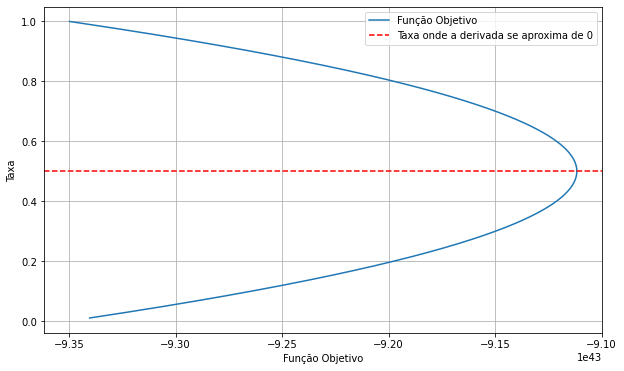

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Variáveis fictícias para simulação
variables = np.random.rand(80)

# Funções ajustadas para retornarem um valor quadrático em relação à taxa
def predict_churn(rate, variables):
    return (rate - 0.5)**2 + variables[0]

def predict_revenue(rate, variables):
    return -1*(rate - 0.5)**2 + variables[0]

# Função para calcular a função objetivo para um conjunto de pesos e taxa
def weighted_objective(weights, rate, variables):
    churn_prob = predict_churn(rate, variables)
    revenue_prob = predict_revenue(rate, variables)
    return weights[0] * churn_prob - weights[1] * revenue_prob

# Intervalo de taxas a serem testadas
rate_range = np.linspace(0.01, 1, 1000)

# Pesos iniciais
initial_weights = [0.5, 0.5]

# Função objetivo para a otimização dos pesos
def weights_objective(weights):
    objective_values = [weighted_objective(weights, rate, variables) for rate in rate_range]
    return np.min(objective_values)

# Busca os pesos que minimizam a função objetivo
weights_result = minimize(weights_objective, initial_weights, method='Nelder-Mead')

# Os pesos otimizados
optimized_weights = weights_result.x

# Calcula a função objetivo para cada taxa usando os pesos otimizados
objective_values = [weighted_objective(optimized_weights, rate, variables) for rate in rate_range]

# Encontra o índice da taxa ótima
optimal_index = np.argmin(objective_values)

# Escolha um limite aceitável para a variação da função objetivo
objective_limit = min(objective_values) * 1.05

# Encontra os índices das taxas que estão dentro do limite aceitável
acceptable_indices = [i for i, value in enumerate(objective_values) if value <= objective_limit]

# As taxas de piso e teto são as taxas mínimas e máximas, respectivamente, dentro do intervalo aceitável
if acceptable_indices:
    floor_rate = rate_range[min(acceptable_indices)]
    ceiling_rate = rate_range[max(acceptable_indices)]
else:
    print("Nenhum índice aceitável encontrado. Ajuste o limite da função objetivo.")
    floor_rate = None
    ceiling_rate = None

print(f"Os pesos otimizados são {optimized_weights}")
print(f"A taxa ótima é {rate_range[optimal_index]}")
if floor_rate and ceiling_rate:
    print(f"A taxa de piso é {floor_rate}")
    print(f"A taxa de teto é {ceiling_rate}")

# Para visualizar a curva de preço
plt.figure(figsize=(10,6))
plt.plot(objective_values, rate_range, label='Função Objetivo')

# Calcula a derivada da função objetivo
derivative = np.gradient(objective_values)

# Encontra o índice onde a derivada é minimizada
min_derivative_index = np.argmin(np.abs(derivative))

plt.axhline(y=rate_range[min_derivative_index], color='r', linestyle='--', label='Taxa onde a derivada se aproxima de 0')
if floor_rate and ceiling_rate:
    plt.axhline(y=floor_rate, color='g', linestyle='--', label='Taxa de Piso')
    plt.axhline(y=ceiling_rate, color='b', linestyle='--', label='Taxa de Teto')

plt.ylabel('Taxa')
plt.xlabel('Função Objetivo')
plt.legend()
plt.grid(True)
plt.show()


Os pesos otimizados são [ 2.97228030e+43 -1.51800581e+43]
A taxa ótima é 0.24981981981981985


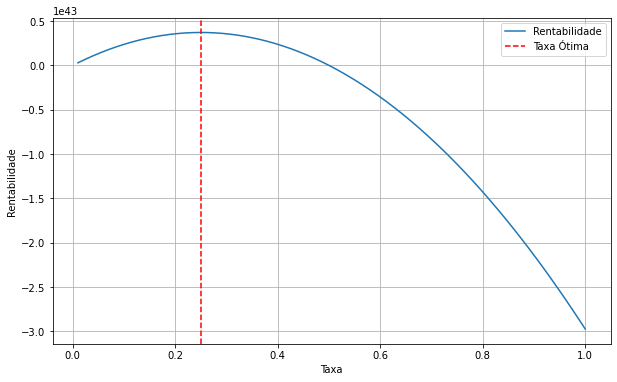

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Variáveis fictícias para simulação
variables = np.random.rand(80)

# Funções ajustadas para retornar volumes lineares em relação à taxa
def predict_churn(rate, variables):
    return rate + variables[0]

def predict_revenue(rate, variables):
    return 1 - rate + variables[0]

# Função para calcular a rentabilidade para um conjunto de pesos e taxa
def profitability(weights, rate, variables):
    volume_lost = predict_churn(rate, variables)
    estimated_volume = predict_revenue(rate, variables)
    return weights[0] * rate * (estimated_volume - volume_lost)

# Intervalo de taxas a serem testadas
rate_range = np.linspace(0.01, 1, 1000)

# Pesos iniciais
initial_weights = [0.5, 0.5]

# Função para a otimização dos pesos
def weights_objective(weights):
    profitability_values = [profitability(weights, rate, variables) for rate in rate_range]
    return -1 * np.max(profitability_values)

# Busca os pesos que maximizam a rentabilidade
weights_result = minimize(weights_objective, initial_weights, method='Nelder-Mead')

# Os pesos otimizados
optimized_weights = weights_result.x

# Calcula a rentabilidade para cada taxa usando os pesos otimizados
profitability_values = [profitability(optimized_weights, rate, variables) for rate in rate_range]

# Encontra o índice da taxa ótima
optimal_index = np.argmax(profitability_values)

print(f"Os pesos otimizados são {optimized_weights}")
print(f"A taxa ótima é {rate_range[optimal_index]}")

# Para visualizar a curva de rentabilidade
plt.figure(figsize=(10,6))
plt.plot(rate_range, profitability_values, label='Rentabilidade')
plt.axvline(x=rate_range[optimal_index], color='r', linestyle='--', label='Taxa Ótima')

plt.xlabel('Taxa')
plt.ylabel('Rentabilidade')
plt.legend()
plt.grid(True)
plt.show()


Os pesos otimizados são [-6.06862353e+43  5.11627645e+43]
A taxa ótima é 1.0


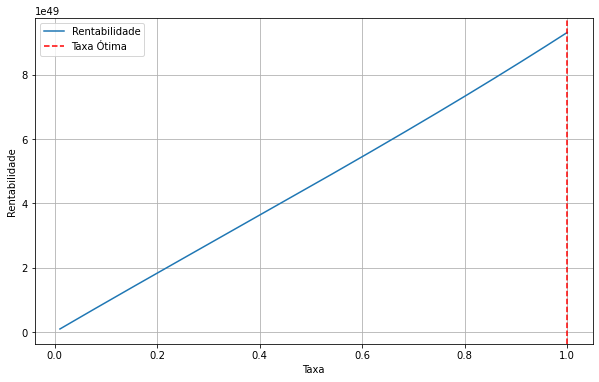

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Variáveis fictícias para simulação
variables = np.random.rand(80)

# Funções ajustadas para retornar probabilidades
def predict_churn(rate, variables):
    return (rate - 0.5)**2 + variables[0]

def predict_revenue(rate, variables):
    return -1*(rate - 0.5)**2 + variables[0]

# Volume inicial
initial_volume = 1_000_000

# Função para calcular a rentabilidade para um conjunto de pesos e taxa
def profitability(weights, rate, variables):
    churn_prob = predict_churn(rate, variables)
    revenue_prob = predict_revenue(rate, variables)

    lost_volume = weights[0] * initial_volume * churn_prob
    revenue_volume = weights[1] * initial_volume * revenue_prob

    return rate * (revenue_volume - lost_volume)

# Intervalo de taxas a serem testadas
rate_range = np.linspace(0.01, 1, 1000)

# Pesos iniciais
initial_weights = [0.5, 0.5]

# Função para a otimização dos pesos
def weights_objective(weights):
    profitability_values = [profitability(weights, rate, variables) for rate in rate_range]
    return -1 * np.max(profitability_values)

# Busca os pesos que maximizam a rentabilidade
weights_result = minimize(weights_objective, initial_weights, method='Nelder-Mead')

# Os pesos otimizados
optimized_weights = weights_result.x

# Calcula a rentabilidade para cada taxa usando os pesos otimizados
profitability_values = [profitability(optimized_weights, rate, variables) for rate in rate_range]

# Encontra o índice da taxa ótima
optimal_index = np.argmax(profitability_values)

print(f"Os pesos otimizados são {optimized_weights}")
print(f"A taxa ótima é {rate_range[optimal_index]}")

# Para visualizar a curva de rentabilidade
plt.figure(figsize=(10,6))
plt.plot(rate_range, profitability_values, label='Rentabilidade')
plt.axvline(x=rate_range[optimal_index], color='r', linestyle='--', label='Taxa Ótima')

plt.xlabel('Taxa')
plt.ylabel('Rentabilidade')
plt.legend()
plt.grid(True)
plt.show()


Os pesos otimizados são [-6.06862353e+43  5.11627645e+43]
A taxa ótima é 0.5927027027027028


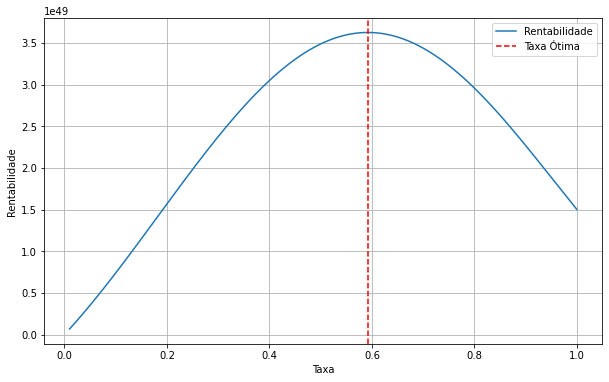

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Variáveis fictícias para simulação
variables = np.random.rand(80)

# Funções ajustadas para retornar probabilidades complexas
def predict_churn(rate, variables):
    return ((rate - 0.5)**2 + np.sin(rate * np.pi)) / 2 + variables[0]

def predict_revenue(rate, variables):
    return ((-1*(rate - 0.5)**2 + np.cos(rate * np.pi)) / 2) + variables[0]

# Volume inicial
initial_volume = 1_000_000

# Função para calcular a rentabilidade para um conjunto de pesos e taxa
def profitability(weights, rate, variables):
    churn_prob = predict_churn(rate, variables)
    revenue_prob = predict_revenue(rate, variables)

    lost_volume = weights[0] * initial_volume * churn_prob
    revenue_volume = weights[1] * initial_volume * revenue_prob

    return rate * (revenue_volume - lost_volume)

# Intervalo de taxas a serem testadas
rate_range = np.linspace(0.01, 1, 1000)

# Pesos iniciais
initial_weights = [0.5, 0.5]

# Função para a otimização dos pesos
def weights_objective(weights):
    profitability_values = [profitability(weights, rate, variables) for rate in rate_range]
    return -1 * np.max(profitability_values)

# Busca os pesos que maximizam a rentabilidade
weights_result = minimize(weights_objective, initial_weights, method='Nelder-Mead')

# Os pesos otimizados
optimized_weights = weights_result.x

# Calcula a rentabilidade para cada taxa usando os pesos otimizados
profitability_values = [profitability(optimized_weights, rate, variables) for rate in rate_range]

# Encontra o índice da taxa ótima
optimal_index = np.argmax(profitability_values)

print(f"Os pesos otimizados são {optimized_weights}")
print(f"A taxa ótima é {rate_range[optimal_index]}")

# Para visualizar a curva de rentabilidade
plt.figure(figsize=(10,6))
plt.plot(rate_range, profitability_values, label='Rentabilidade')
plt.axvline(x=rate_range[optimal_index], color='r', linestyle='--', label='Taxa Ótima')

plt.xlabel('Taxa')
plt.ylabel('Rentabilidade')
plt.legend()
plt.grid(True)
plt.show()


Os pesos otimizados são [-6.06862353e+43  5.11627645e+43]
A taxa ótima é 1.0


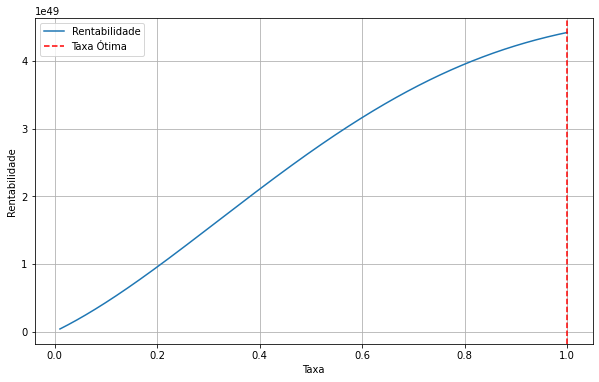

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Variáveis fictícias para simulação
variables = np.random.rand(80)

# Funções ajustadas para modelar um comportamento semelhante à curva de Laffer
def predict_churn(rate, variables):
    return ((rate - 0.5)**3 + variables[0]) / 2

def predict_revenue(rate, variables):
    return -1*(rate - 0.5)**2 + variables[0]

# Volume inicial
initial_volume = 1_000_000

# Função para calcular a rentabilidade para um conjunto de pesos e taxa
def profitability(weights, rate, variables):
    churn_prob = predict_churn(rate, variables)
    revenue_prob = predict_revenue(rate, variables)

    lost_volume = weights[0] * initial_volume * churn_prob
    revenue_volume = weights[1] * initial_volume * revenue_prob

    return rate * (revenue_volume - lost_volume)

# Intervalo de taxas a serem testadas
rate_range = np.linspace(0.01, 1, 1000)

# Pesos iniciais
initial_weights = [0.5, 0.5]

# Função para a otimização dos pesos
def weights_objective(weights):
    profitability_values = [profitability(weights, rate, variables) for rate in rate_range]
    return -1 * np.max(profitability_values)

# Busca os pesos que maximizam a rentabilidade
weights_result = minimize(weights_objective, initial_weights, method='Nelder-Mead')

# Os pesos otimizados
optimized_weights = weights_result.x

# Calcula a rentabilidade para cada taxa usando os pesos otimizados
profitability_values = [profitability(optimized_weights, rate, variables) for rate in rate_range]

# Encontra o índice da taxa ótima
optimal_index = np.argmax(profitability_values)

print(f"Os pesos otimizados são {optimized_weights}")
print(f"A taxa ótima é {rate_range[optimal_index]}")

# Para visualizar a curva de rentabilidade
plt.figure(figsize=(10,6))
plt.plot(rate_range, profitability_values, label='Rentabilidade')
plt.axvline(x=rate_range[optimal_index], color='r', linestyle='--', label='Taxa Ótima')

plt.xlabel('Taxa')
plt.ylabel('Rentabilidade')
plt.legend()
plt.grid(True)
plt.show()


Os pesos otimizados são [-6.06862353e+43  5.11627645e+43]
A taxa ótima é 0.7839639639639641


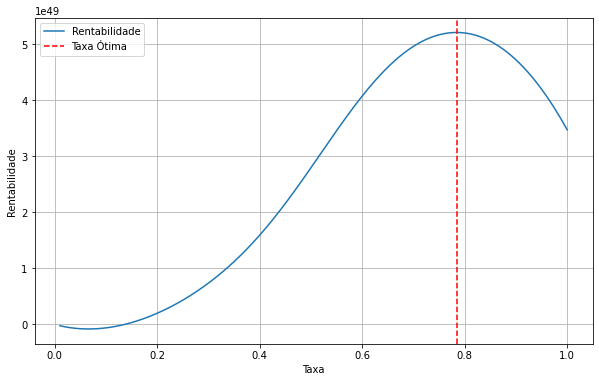

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit

# Variáveis fictícias para simulação
variables = np.random.rand(80)

# Funções ajustadas para modelar um comportamento semelhante à curva de Laffer
def predict_churn(rate, variables):
    return expit(10*(rate - 0.5))

def predict_revenue(rate, variables):
    return -4 * (rate - 0.5)**2 + 0.5

# Volume inicial
initial_volume = 1_000_000

# Função para calcular a rentabilidade para um conjunto de pesos e taxa
def profitability(weights, rate, variables):
    churn_prob = predict_churn(rate, variables)
    revenue_prob = predict_revenue(rate, variables)

    lost_volume = weights[0] * initial_volume * churn_prob
    revenue_volume = weights[1] * initial_volume * revenue_prob

    return rate * (revenue_volume - lost_volume)

# Intervalo de taxas a serem testadas
rate_range = np.linspace(0.01, 1, 1000)

# Pesos iniciais
initial_weights = [0.5, 0.5]

# Função para a otimização dos pesos
def weights_objective(weights):
    profitability_values = [profitability(weights, rate, variables) for rate in rate_range]
    return -1 * np.max(profitability_values)

# Busca os pesos que maximizam a rentabilidade
weights_result = minimize(weights_objective, initial_weights, method='Nelder-Mead')

# Os pesos otimizados
optimized_weights = weights_result.x

# Calcula a rentabilidade para cada taxa usando os pesos otimizados
profitability_values = [profitability(optimized_weights, rate, variables) for rate in rate_range]

# Encontra o índice da taxa ótima
optimal_index = np.argmax(profitability_values)

print(f"Os pesos otimizados são {optimized_weights}")
print(f"A taxa ótima é {rate_range[optimal_index]}")

# Para visualizar a curva de rentabilidade
plt.figure(figsize=(10,6))
plt.plot(rate_range, profitability_values, label='Rentabilidade')
plt.axvline(x=rate_range[optimal_index], color='r', linestyle='--', label='Taxa Ótima')

plt.xlabel('Taxa')
plt.ylabel('Rentabilidade')
plt.legend()
plt.grid(True)
plt.show()
